In [246]:
#  if you get DWT<0 means it is more than 2 means -ve auto correlation

# here null hypothesis means the variable is non significant and there is no impact

# d and D are integrated means number of difference done here we used two times lag function
# p and P partial auto correlation
# q and Q autocorrelation



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    int64  
 2   Lag         143 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    object 
 1   Passengers  144 non-null    int64  
 2   Lag         143 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passe

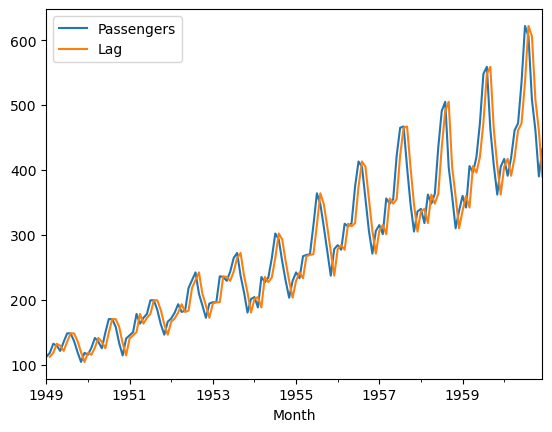

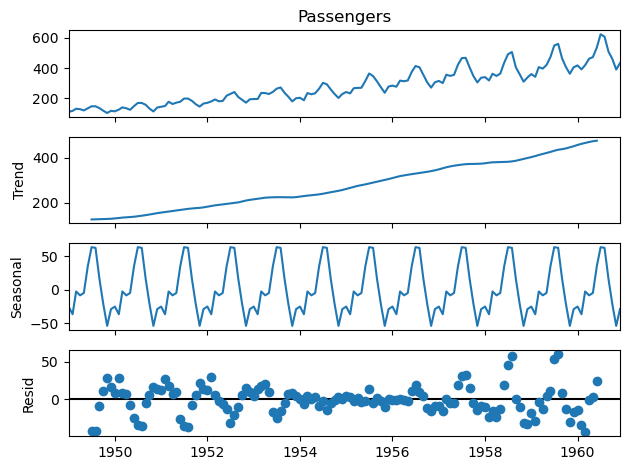

*****************Augmented deckay fuller test analysis***************
ADF Test : 0.8153688792060511
p-value : 0.991880243437641
#Lags : 13
No of jobs : 130
Weak evidence againast null hypothesis and my time series is Non-Stationary
*****************Augmented deckay fuller test analysis***************
ADF Test : -2.8292668241699874
p-value : 0.05421329028382711
#Lags : 12
No of jobs : 130
Weak evidence againast null hypothesis and my time series is Non-Stationary
*****************Augmented deckay fuller test analysis***************
ADF Test : -16.384231542468523
p-value : 2.7328918500141235e-29
#Lags : 11
No of jobs : 130
Strong evidence againast null hypothesis and my time series is Stationary
*****************Augmented deckay fuller test analysis***************
ADF Test : -3.3830207264924796
p-value : 0.011551493085515008
#Lags : 1
No of jobs : 130
Strong evidence againast null hypothesis and my time series is Stationary


In [247]:
%run 19-Nov.ipynb


In [248]:
dataset.head()

,Passengers,Lag,1st Diff,2st Diff,Seasonality
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,6.0,NaN,NaN
1949-03-01,132,118.0,14.0,8.0,NaN
1949-04-01,129,132.0,-3.0,-17.0,NaN
1949-05-01,121,129.0,-8.0,-5.0,NaN


In [249]:
dataset['2st Diff'].isnull().sum()

2

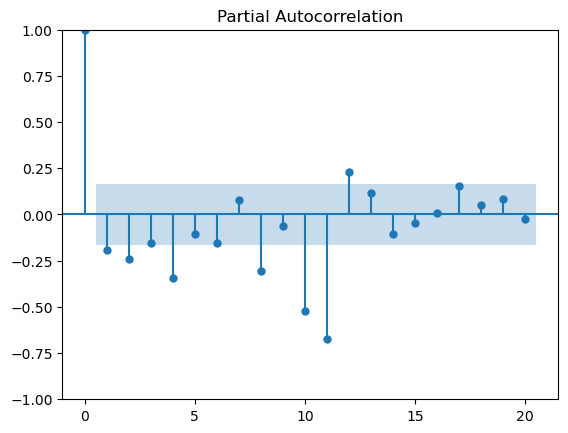

In [250]:
# p, q and P, Q we have to use graphic tsaplots
# p-P-partial autocorrelation=plot_pacf
# q-Q-autocorrelation=plot_acf

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(dataset['2st Diff'].dropna(),lags=20)
plt.show()

# here -1 to 1 is correlation range
# here partial autocorrelation number is 4 because this is the first which comes under shaded part after 4 points so, p=4

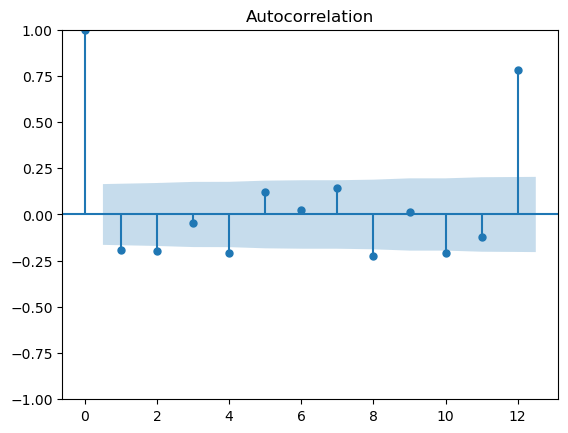

In [251]:
# Auto correlation

plot_acf(dataset['2st Diff'].dropna(),lags=12)
plt.show()

In [252]:
# so Q is 2 here as above
# Now
# d=2,p=4,q=2
# D=1,P=?,Q=?



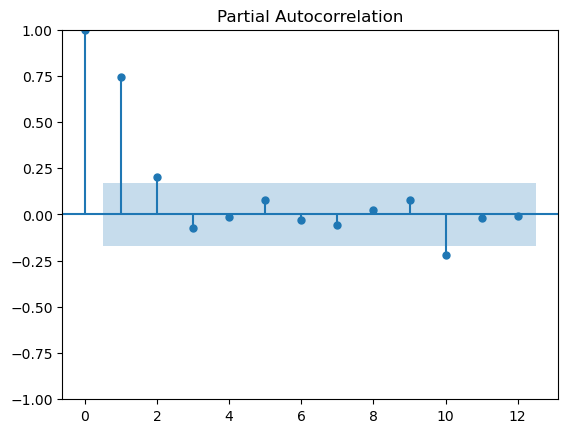

In [253]:
plot_pacf(dataset['Seasonality'].dropna(),lags=12)
plt.show()
# P=2

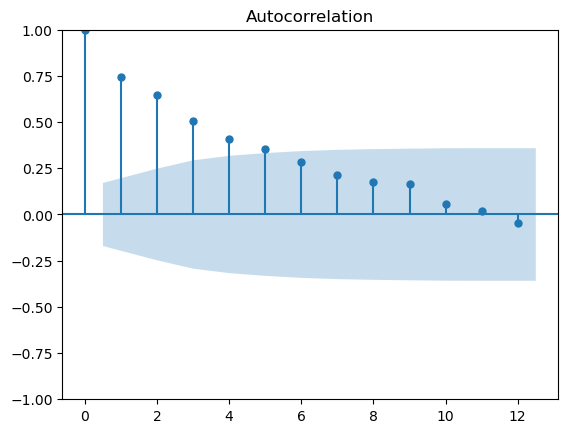

In [254]:
plot_acf(dataset['Seasonality'].dropna(),lags=12)
plt.show()
# Q=5

## Trend
#### d=2, p=4, q=2

## Seasonality
#### D=1, P=2, Q=5

# SARIMAX - Seasonality AutoRegressive Integrated Moving Average with External factors


#### as this is MakeMyTrip air passenger data so external factor also matter like weather, war, highjack etc


In [257]:
# Trend pdq=(4,2,2)
# Seasonality PDQS=(2,1,5,12)
# external factor means weather, war, flue

In [258]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [259]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(4,2,2),seasonal_order=(2,1,5,12))

In [260]:
result=model.fit()
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                                       Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.716
Date:                                          Tue, 22 Jul 2025   AIC                           1021.431
Time:                                                  20:58:09   BIC                           1061.577
Sample:                                              01-01-1949   HQIC                          1037.744
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [261]:
# Below endog means dependent variable

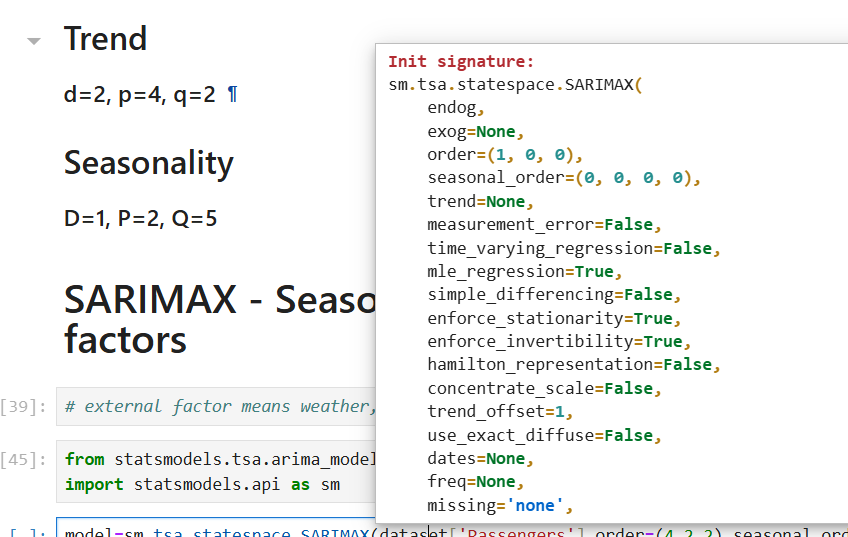

In [263]:
# AIC: Aikike information criteria-- lessar the aic good model
# BIC: Bayessian information criteria

In [264]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(4,2,2),seasonal_order=(2,1,4,12))

In [265]:
res=model.fit()
print(res.summary())

                                           SARIMAX Results                                           
Dep. Variable:                                    Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.020
Date:                                       Tue, 22 Jul 2025   AIC                           1020.040
Time:                                               20:58:19   BIC                           1057.318
Sample:                                           01-01-1949   HQIC                          1035.187
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3726     

In [266]:
# SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)
# suggesting [1,2,3,4] values

In [267]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(4,2,2),seasonal_order=(2,1,3,12))
res=model.fit()
print(res.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                 Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.168
Date:                                    Tue, 22 Jul 2025   AIC                           1018.335
Time:                                            20:58:26   BIC                           1052.746
Sample:                                        01-01-1949   HQIC                          1032.317
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3715      0.098    -14.001      0

In [268]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(4,2,2),seasonal_order=(2,1,2,12))
res=model.fit()
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -497.783
Date:                            Tue, 22 Jul 2025   AIC                           1017.565
Time:                                    20:58:30   BIC                           1049.108
Sample:                                01-01-1949   HQIC                          1030.382
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3577      0.099    -13.706      0.000      -1.552      -1.164
ar.L2         -0.4919      0.145   

In [269]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(4,2,2),seasonal_order=(2,1,1,12))
res=model.fit()
print(res.summary())

                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.785
Date:                              Tue, 22 Jul 2025   AIC                           1015.571
Time:                                      20:58:34   BIC                           1044.246
Sample:                                  01-01-1949   HQIC                          1027.222
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3602      0.097    -14.032      0.000      -1.550      -1.170
ar.L2         -0.49

In [270]:
# Seasonal order 
# seasonal_oder=(2,1,5,12) AIC: 1021
# seasonal_oder=(2,1,4,12) AIC: 1020
# seasonal_oder=(2,1,3,12) AIC: 1018
# seasonal_oder=(2,1,2,12) AIC: 1017
# seasonal_oder=(2,1,1,12) AIC: 1015

In [271]:
# lessor AIC is better the model


# check model performance

In [273]:
dataset['forecast']=res.predict(start=130,end=144,dynamic=True)

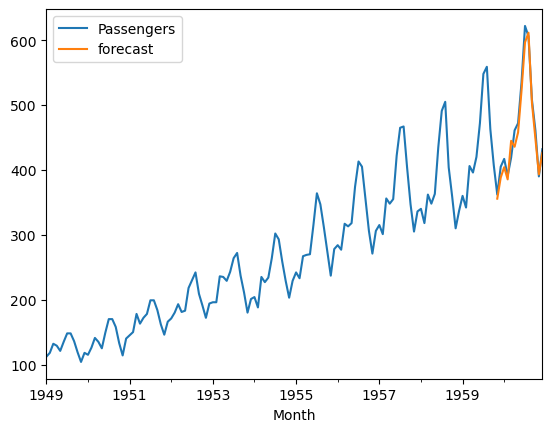

In [274]:
dataset[['Passengers','forecast']].plot()
plt.show()
# start=testing start, end=tetsing end

In [275]:
# here we have trained model with 0-144 valuse
# did testing or prediction part for 130-144
#### starting we saw noise in data so that why we are getting some error factor in plot

In [276]:
# forecasting passengers for 5 years
# 1961-1962-1963-1964-19645

In [277]:
dataset.tail()

,Passengers,Lag,1st Diff,2st Diff,Seasonality,forecast
Month,,,,,,
1960-08-01,606,622.0,-16.0,-103.0,47.0,611.565879
1960-09-01,508,606.0,-98.0,-82.0,45.0,503.456132
1960-10-01,461,508.0,-47.0,51.0,54.0,448.460992
1960-11-01,390,461.0,-71.0,-24.0,28.0,393.179282
1960-12-01,432,390.0,42.0,113.0,27.0,426.446952


In [278]:
from pandas.tseries.offsets import DateOffset

In [279]:
dataset.index[-1]

Timestamp('1960-12-01 00:00:00')

In [280]:
future_date=[dataset.index[-1]+DateOffset(months=x) for x in range(0,61)]

In [281]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [282]:
future_dates_df=pd.DataFrame(index=future_date[1:],columns=dataset.columns)
future_dates_df.tail(60)

,Passengers,Lag,1st Diff,2st Diff,Seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
len(future_dates_df.tail(60))

60

In [284]:
# append the both the table together(original dataset and future dataset)
future_df=pd.concat([dataset,future_dates_df])
future_df

,Passengers,Lag,1st Diff,2st Diff,Seasonality,forecast
1949-01-01,112,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,6.0,NaN,NaN,NaN
1949-03-01,132,118.0,14.0,8.0,NaN,NaN
1949-04-01,129,132.0,-3.0,-17.0,NaN,NaN
1949-05-01,121,129.0,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN,NaN


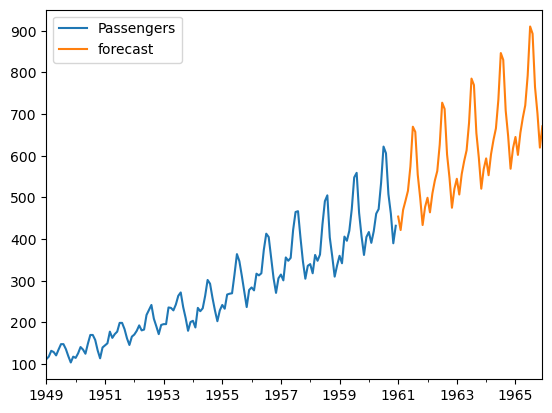

In [285]:
future_df['forecast']=res.predict(start=144,end=206,dynamic=True)
future_df[['Passengers','forecast']].plot()
plt.show()

In [286]:
future_df.tail(60)

,Passengers,Lag,1st Diff,2st Diff,Seasonality,forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN,454.027887
1961-02-01,NaN,NaN,NaN,NaN,NaN,421.811416
1961-03-01,NaN,NaN,NaN,NaN,NaN,469.895967
1961-04-01,NaN,NaN,NaN,NaN,NaN,492.239459
1961-05-01,NaN,NaN,NaN,NaN,NaN,515.923386
1961-06-01,NaN,NaN,NaN,NaN,NaN,574.247071
1961-07-01,NaN,NaN,NaN,NaN,NaN,669.674966
1961-08-01,NaN,NaN,NaN,NaN,NaN,657.173076
1961-09-01,NaN,NaN,NaN,NaN,NaN,554.729141
1961-10-01,NaN,NaN,NaN,NaN,NaN,499.199920


In [295]:
future_df.to_csv('final_forecast_airpassenger_trip_dataset.csv')

In [296]:
# WE NEED TO DO MAPE-0-20% IS ACCEPTABLE 

# Hyper parameter tuning with TSF

In [298]:
dataset['Passengers'][:144]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

In [299]:
print(mse(dataset['Passengers'][:144],future_df['Passengers'][:144]))

0.0


In [300]:
# another method to find parameter (k)-pdq and PDQ

In [301]:
import itertools

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q)) # trend
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]


print("check some random combinations are: ")
print("{} x {} ".format(pdq[0],seasonal_pdq[1]))
print("{} x {} ".format(pdq[1],seasonal_pdq[0]))
print("{} x {} ".format(pdq[2],seasonal_pdq[2]))
print("{} x {} ".format(pdq[0],seasonal_pdq[2]))

check some random combinations are: 
(0, 0, 0) x (0, 0, 1, 12) 
(0, 0, 1) x (0, 0, 0, 12) 
(0, 1, 0) x (0, 1, 0, 12) 
(0, 0, 0) x (0, 1, 0, 12) 


In [302]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=param,seasonal_order=param_seasonal,
                                            enforce_stationarity=False,enforce_invertibility=False)
            result=model.fit()
            print("SARIMA {} X {} - AIC : {}".format(param,param_seasonal, result.aic))
        except:
            continue

# enforce_invertibility--autocorrelation
# enforce_stationarity--partial auto correlation

SARIMA (0, 0, 0) X (0, 0, 0, 12) - AIC : 2044.4329486427587
SARIMA (0, 0, 0) X (0, 0, 1, 12) - AIC : 1887.1867034067932
SARIMA (0, 0, 0) X (0, 1, 0, 12) - AIC : 1315.9211929474204
SARIMA (0, 0, 0) X (0, 1, 1, 12) - AIC : 1156.291490150855
SARIMA (0, 0, 0) X (1, 0, 0, 12) - AIC : 1118.6259190717344
SARIMA (0, 0, 0) X (1, 0, 1, 12) - AIC : 1107.2562043239632
SARIMA (0, 0, 0) X (1, 1, 0, 12) - AIC : 1109.2437994445113
SARIMA (0, 0, 0) X (1, 1, 1, 12) - AIC : 1033.617216672977
SARIMA (0, 0, 1) X (0, 0, 0, 12) - AIC : 1846.0789377571505
SARIMA (0, 0, 1) X (0, 0, 1, 12) - AIC : 1567.9916312320756
SARIMA (0, 0, 1) X (0, 1, 0, 12) - AIC : 1196.998361439976
SARIMA (0, 0, 1) X (0, 1, 1, 12) - AIC : 1072.1382984044367
SARIMA (0, 0, 1) X (1, 0, 0, 12) - AIC : 1071.0026810723214
SARIMA (0, 0, 1) X (1, 0, 1, 12) - AIC : 1049.5801417137461
SARIMA (0, 0, 1) X (1, 1, 0, 12) - AIC : 1059.5112223290457
SARIMA (0, 0, 1) X (1, 1, 1, 12) - AIC : 985.3346478032054
SARIMA (0, 1, 0) X (0, 0, 0, 12) - AIC : 140

In [303]:
# ARIMA (0, 1, 1) X (1, 1, 1, 12) - AIC : 920.3192974988626

In [304]:
model=sm.tsa.statespace.SARIMAX(dataset['Passengers'],order=(0,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
result=model.fit()
print(result.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Tue, 22 Jul 2025   AIC                            920.319
Time:                                    20:59:28   BIC                            931.368
Sample:                                01-01-1949   HQIC                           924.805
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

#  we need to judge by AIC which ever is having less that is good parameter

# Fully automation not recomended but should know

In [307]:
# %pip install pmdarima

In [308]:
from pmdarima import auto_arima

In [309]:
model=auto_arima(y=dataset['Passengers'],trace=True)

# trace=True means i want to see results, visualize

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [324]:
# this is not good because the AIC value is not good
# we only have this automation method for arima not for sarima
# we will get good results in R than python